# Time Series Practice

Data is Bitcoin data at 1-min intervals from select exchanges, Jan 2012 to August 2019 - [source](https://www.kaggle.com/mczielinski/bitcoin-historical-data)

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose

In [2]:
# Read df
df = pd.read_csv('bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')

In [3]:
# Check the shape of the data
df.shape

(3997697, 8)

In [4]:
# Check the first 10 rows...
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Woah! Nulls! Is that going to be a problem?
df.isna().sum()
# 1231878 / 3997697 = .3ish (about 1/3 of our data is null)

Timestamp                  0
Open                 1231878
High                 1231878
Low                  1231878
Close                1231878
Volume_(BTC)         1231878
Volume_(Currency)    1231878
Weighted_Price       1231878
dtype: int64

In [6]:
# Before worrying about nulls, let's change the timestamp
# By setting unit to seconds, we get the date from the unix time
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit='s')

In [7]:
# Let's go ahead and set the index to be a datetime index
df.set_index('Timestamp', inplace=True)

In [8]:
# Now let's look at how that impacted the time/index
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2019-08-11 23:56:00,11555.57,11555.57,11540.37,11540.58,0.036868,425.909106,11552.336234
2019-08-11 23:57:00,11553.49,11556.22,11553.49,11556.22,0.623462,7204.428272,11555.520505
2019-08-11 23:58:00,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199
2019-08-11 23:59:00,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889
2019-08-12 00:00:00,11527.44,11551.57,11520.00,11520.00,23.805939,274731.256920,11540.450291


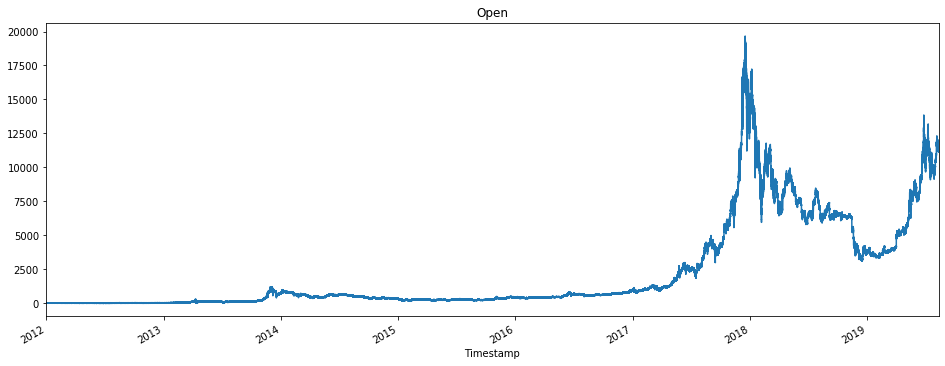

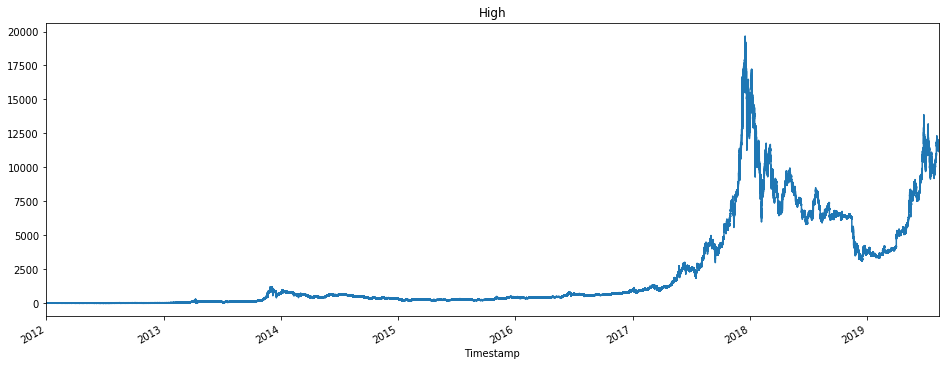

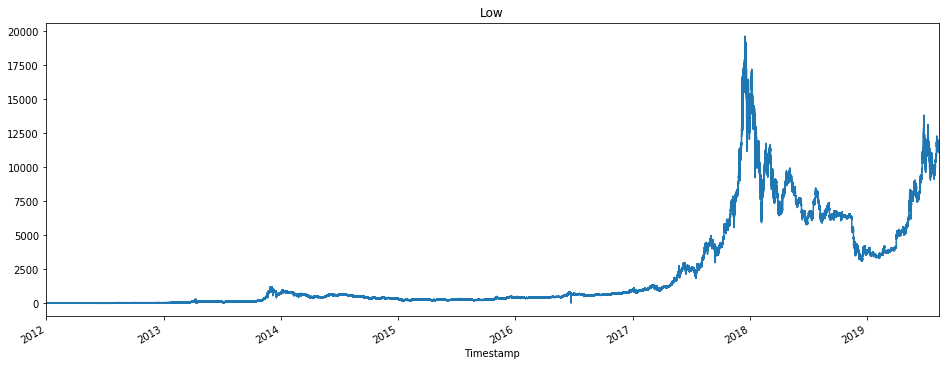

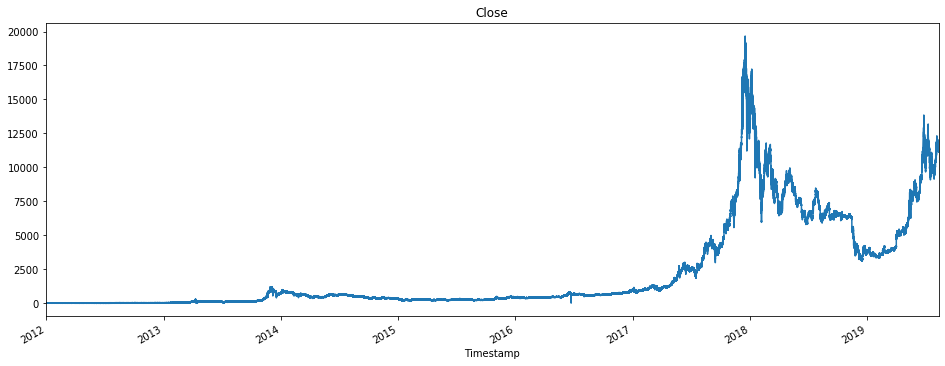

In [ ]:
# Let's visualize all of our columns, to get a sense of the data
for col in df.columns:
    plt.figure(figsize=(16,6))
    df[col].plot()
    plt.title(col)
    plt.show()

So we can see the general trends in our data, and we can see that, if those nulls are having an impact, it's not apparent in the plot!

Regarding the Open / High / Low / Close plots - do you see much of a difference?

Also! This is why we change our data to use the datetime object as the index - makes EVERYTHING easier!

## Changing the frequency of our data 

Also called downsampling or upsampling, depending on whether you're going to a less frequent or more frequent point in time.

[Here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling) is a reference for resampling based on time frequency. (you can find the actual codes you can use as arguments in the resample function [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)).

In [ ]:
# Downsampling to a daily cadence
df_daily = df.resample('D').mean()

In [ ]:
df_daily.head()

In [ ]:
# Let's check if we still have any nulls
df_daily.isna().sum()

In [ ]:
# Looking into where those nulls are...
df_daily.loc[df_daily['Open'].isna() == True]

In [ ]:
# Let's visualize just one column to see what changed on a daily scale
plt.figure(figsize=(16,6))
df_daily['Open'].plot()
plt.title('Average Open Price - Daily')
plt.show()

I don't see much of a change, just fewer data points - it's probably safe to say that we didn't lose much data by downsampling to a daily mean.

But what about downsampling to monthly?

In [ ]:
# Here we're downsampling to month end, denoted by 'M'
# If we wanted month start, we could use 'MS'
df_monthly = df.resample('M').mean()
df_monthly.head()

In [ ]:
# Again, visualizing the Average Opening price
plt.figure(figsize=(16,6))
df_monthly['Open'].plot()
plt.title('Average Open Price - Monthly')
plt.show()

And what about quarterly?

In [ ]:
# Here we're downsampling to month end, denoted by 'M'
# If we wanted month start, we could use 'MS'
df_quarterly = df.resample('Q').mean()
df_quarterly.head()

In [ ]:
# Again, visualizing the Average Opening price
plt.figure(figsize=(16,6))
df_quarterly['Open'].plot()
plt.title('Average Open Price - Quarterly')
plt.show()

So, as would make sense, as you change the frequency of your data it changes the granularity (level of detail) that's conveyed.

Before we move forward, let's grab a single year from this data, 2017, at the daily frequency to explore.

In [ ]:
df_2017 = df[df.index.year == 2017]

In [ ]:
df_2017_daily = df_2017.resample('D').mean()

In [ ]:
df_2017_daily.head()

## Stationarity

Introduction to stationarity from [_Forecasting: Principles and Practice_](https://otexts.com/fpp2/stationarity.html):

> "A stationary time series is one whose properties do not depend on the time at which the series is observed.14 Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.
>
> "Some cases can be confusing — a time series with cyclic behaviour (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be.
>
> "In general, a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance."

And here's a [useful blog post](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322) on the subject, where I found the below demonstrative image:

![Examples of stationary and non-stationary processes, from the above medium blog](https://miro.medium.com/max/1400/1*tkx0_wwQ2JT7pSlTeg4yzg.png)

In [ ]:
# Let's  get the rolling mean and rolling standard deviation, for the 
# opening price, using a 5-day window

roll_mean = df_2017_daily['Open'].rolling(window=5, center=False).mean()
roll_std = df_2017_daily['Open'].rolling(window=5, center=False).std()

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_2017_daily['Open'], color='blue',label='Average Daily Opening Price')
ax.plot(roll_mean, color='red', label='Rolling 5-Day Mean')
ax.plot(roll_std, color='black', label='Rolling 5-Day Standard Deviation')
ax.legend()
fig.tight_layout()

Do you think this data is stationary? Why or why not?

 - 
 

There's a test for this!

From Bryan's notebook:

> **Augumented Dickey-Fuller test**: a hypothesis test, where we reject the null hypothesis (that a time series is non-stationary) if the test-statistic is less than the critical value

[Documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html) for the Dickey-Fuller test in StatsModels

So let's write out our null and alternative hypotheses (remember these??):

Ho = 

Ha = 

In [ ]:
# Feed in our Open column, since the test function expects a series:
adfuller(df_2017_daily['Open'])

Let's interpret the output of this test:

- 


In [ ]:
# Now that we've determined whether the data is stationary, let's decompose it

# Using the decompose function from the arima model
# Need to feed it an array, hence the .values attribute
decomposed = decompose(df_2017_daily['Open'].values, 'additive', m=20)

In [ ]:
# Plotting the pieces using the arima model again
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

In [ ]:
# Now let's check the difference

df_2017_daily_diff = df_2017_daily['Open'].diff()

In [ ]:
# Now grabbing the rolling mean and std for the difference
diff_roll_mean = df_2017_daily_diff.rolling(window=5, center=False).mean()
diff_roll_std = df_2017_daily_diff.rolling(window=5, center=False).std()

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_2017_daily_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

More or less stationary?

- 


In [ ]:
# What if we logged the data?
logged_2017_daily = np.log1p(df_2017_daily['Open'])

In [ ]:
# Now grabbing the rolling mean and std for the difference
log_roll_mean = logged_2017_daily.rolling(window=5, center=False).mean()
log_roll_std = logged_2017_daily.rolling(window=5, center=False).std()

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_2017_daily, color='blue',label='Difference')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

More or less stationary?

- 


Any further ideas? 

- 
